In [22]:
import pandas as pd
import numpy as np

# 예시 데이터 생성
df = pd.DataFrame({
    'Group': ['A', 'B', 'A', 'B', 'A', 'B', 'C', 'C', 'A', 'B', 'C'],
    'Value': [1.0, np.nan, 3.0, 4.0, np.nan, np.nan, 7.0, 8.0, 1.0, 4.0, 7.0]
})

df

,Group,Value
0,A,1.0
1,B,NaN
2,A,3.0
3,B,4.0
4,A,NaN
5,B,NaN
6,C,7.0
7,C,8.0
8,A,1.0
9,B,4.0


In [24]:
df_g = df.groupby('Group')['Value'].transform('mean')
df_g

0     1.666667
1     4.000000
2     1.666667
3     4.000000
4     1.666667
5     4.000000
6     7.333333
7     7.333333
8     1.666667
9     4.000000
10    7.333333
Name: Value, dtype: float64

In [25]:
df['Value_filled'] = df['Value'].fillna(df_g)
df

,Group,Value,Value_filled
0,A,1.0,1.000000
1,B,NaN,4.000000
2,A,3.0,3.000000
3,B,4.0,4.000000
4,A,NaN,1.666667
5,B,NaN,4.000000
6,C,7.0,7.000000
7,C,8.0,8.000000
8,A,1.0,1.000000
9,B,4.0,4.000000


In [28]:
def getMode(srs):
    # x.mode() => 최빈값을 반환, [0]은 첫 번째 최빈값을 가져옴.
    return srs.fillna(srs.mode()[0])

# 최빈값 대체
df_g_mode = df.groupby('Group')['Value'].transform(lambda x: getMode(x))

df_g_mode

0     1.0
1     4.0
2     3.0
3     4.0
4     1.0
5     4.0
6     7.0
7     8.0
8     1.0
9     4.0
10    7.0
Name: Value, dtype: float64

In [29]:
df['Value_Mode'] = df['Value'].fillna(df_g_mode)

In [30]:
df

,Group,Value,Value_filled,Value_Mode
0,A,1.0,1.000000,1.0
1,B,NaN,4.000000,4.0
2,A,3.0,3.000000,3.0
3,B,4.0,4.000000,4.0
4,A,NaN,1.666667,1.0
5,B,NaN,4.000000,4.0
6,C,7.0,7.000000,7.0
7,C,8.0,8.000000,8.0
8,A,1.0,1.000000,1.0
9,B,4.0,4.000000,4.0


In [ ]:
# 신경망 모델
[입력층]       [은닉층 1]       [은닉층 2]       [출력층]
    x₁ ──────→ h₁^(1) ──────→ h₁^(2) ──────→ ŷ
       \     / ↑   \     / ↑      \     / ↑
        \   /  |    \   /  |       \   /  |
         ↘ ↙   b    ↘ ↙   b        ↘ ↙   b
          x₂ ──────→ h₂^(1) ──────→ h₂^(2)
        
# 입력층 → 은닉층1: 2(input) × 2(hidden) + 2(bias) = 6
# 은닉층1 → 은닉층2: 2 × 2 + 2 = 6
# 은닉층2 → 출력층: 2 × 1 + 1 = 3
# 총 파라미터: 6 + 6 + 3 = 15개

파라미터 수 = (입력 차원 + 1) × 은닉층1 노드 수 
             + Σ (이전 은닉층 노드 수 + 1) × 현재 층 노드 수
             + (마지막 은닉층 노드 수 + 1) × 출력 차원

In [ ]:
# 다른 예시 (입력=4, 은닉층=3개[5,3,2], 출력=1)
# (4+1)×5 + (5+1)×3 + (3+1)×2 + (2+1)×1 = 25 + 18 + 8 + 3 = 54개

In [ ]:
입력층     은닉층        출력층
(3개)      (4개)         (2개)
  o         o             o
  o   -->   o     -->     o
  o         o
            o

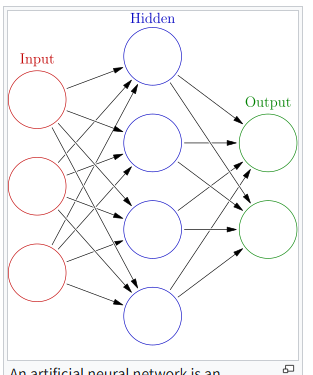

In [ ]:
입력층(Input layer): 3개 노드

은닉층(Hidden layer): 1개 층, 4개 노드

출력층(Output layer): 1개 층, 2개 노드

In [ ]:
레이어 개수
→ 입력층(1) + 은닉층(1) + 출력층(1) = 3개

은닉층 개수
→ 1개

은닉층 노드 수
→ 4개 (1개의 은닉층에 4개의 뉴런)

파라미터 수 (가중치 + 편향)

입력층(3) → 은닉층(4):

가중치: 3 × 4 = 12

편향: 4

은닉층(4) → 출력층(2):

가중치: 4 × 2 = 8

편향: 2

총 파라미터 수 = 12 + 4 + 8 + 2 = 26